Introduction: 
Going to analyse the data of titanic data where how many people survived based on their Age,Sex,Fare,Pclass. 
Algorithms used :- 
    Logistic Regression,
    Decision Tree,
    Random Forest,
    KNN(KNearest Neighbours),
    Naive Bayes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analysing the data

In [2]:
data=pd.read_csv(r'C:\Users\rahuj\Downloads\Titanic.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

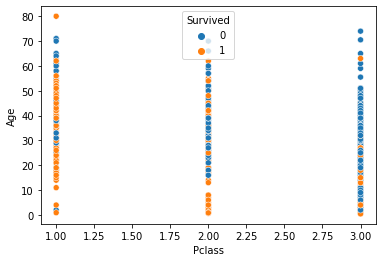

In [4]:
sns.scatterplot(x='Pclass',y='Age',hue='Survived',data=data)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

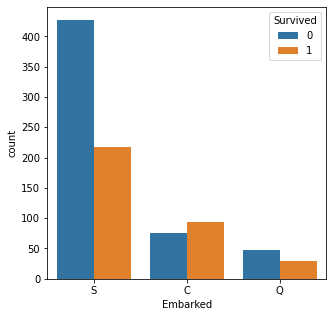

In [5]:
plt.figure(figsize=(5,5))
sns.countplot(x='Embarked',hue='Survived',data=data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

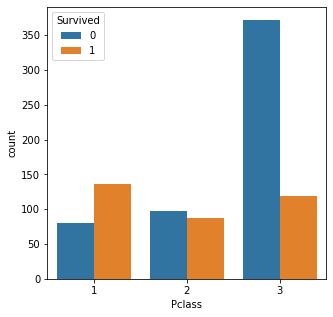

In [6]:
plt.figure(figsize=(5,5))
sns.countplot(x='Pclass',hue='Survived',data=data)

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data wrangling

In [8]:
#Removing missing datas and unwanted rows for classification
data.drop(['Cabin','Name','PassengerId','Ticket','SibSp','Parch'],axis=1,inplace=True)
data.dropna(inplace=True)

In [9]:
data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
6,0,1,male,54.0,51.8625,S
7,0,3,male,2.0,21.0750,S
8,1,3,female,27.0,11.1333,S
9,1,2,female,14.0,30.0708,C
10,1,3,female,4.0,16.7000,S


In [10]:
#Updating the label values into int
Sex=pd.get_dummies(data['Sex'],drop_first=True)
Embark=pd.get_dummies(data['Embarked'],drop_first=True)
Sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [11]:
#adding the created values into the data and removing the duplicates

data=pd.concat([data,Sex,Embark],axis=1)
data=data.drop(['Sex','Embarked'],axis='columns')
data.head(5)

,Survived,Pclass,Age,Fare,male,Q,S
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,0,0,0
2,1,3,26.0,7.9250,0,0,1
3,1,1,35.0,53.1000,0,0,1
4,0,3,35.0,8.0500,1,0,1


# Logistic_Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
#assigning variables to dependent and independend values

inputs=data.drop('Survived',axis=1)
target=data['Survived']
inputs

,Pclass,Age,Fare,male,Q,S
0,3,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,3,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,1
4,3,35.0,8.0500,1,0,1
...,...,...,...,...,...,...
885,3,39.0,29.1250,0,1,0
886,2,27.0,13.0000,1,0,1
887,1,19.0,30.0000,0,0,1
889,1,26.0,30.0000,1,0,0


In [14]:
##Splitting data for training and testing
Xtrain,Xtest,ytrain,ytest=train_test_split(inputs,target,test_size=0.2,random_state=1)

In [15]:
#Standardising the data to convert the mean into 0 and SD into 1
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
s_Xtrain=standard_scaler.fit_transform(Xtrain)
s_Xtest=standard_scaler.fit_transform(Xtest)
s_Xtrain

array([[ 0.93293255, -1.01653457, -0.38915815, -1.3530875 , -0.20984923,
        -1.80174045],
       [ 0.93293255, -0.74593426, -0.51146628,  0.73905051, -0.20984923,
         0.5550189 ],
       [-0.25197509,  0.81001755, -0.41627764,  0.73905051, -0.20984923,
         0.5550189 ],
       ...,
       [ 0.93293255,  1.96006889, -0.52350986,  0.73905051, -0.20984923,
         0.5550189 ],
       [-0.25197509,  0.40411708, -0.41860878,  0.73905051, -0.20984923,
        -1.80174045],
       [ 0.93293255, -0.6106341 , -0.51325287,  0.73905051, -0.20984923,
         0.5550189 ]])

In [16]:
#Model
Lr_model=LogisticRegression()
Lr_model.fit(s_Xtrain,ytrain)
ypre=Lr_model.predict(s_Xtest)
ypre

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [17]:
accuracy_score(ytest,ypre)*100

75.52447552447552

In [18]:
confusion_matrix(ytest,ypre)

array([[67, 18],
       [17, 41]], dtype=int64)

In [19]:
classification_report(ypre,ytest)

'              precision    recall  f1-score   support\n\n           0       0.79      0.80      0.79        84\n           1       0.71      0.69      0.70        59\n\n    accuracy                           0.76       143\n   macro avg       0.75      0.75      0.75       143\nweighted avg       0.75      0.76      0.75       143\n'

# Decision Tree

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [21]:
#assigning variables to dependent and independend values

inputs=data.drop('Survived',axis=1)
target=data['Survived']
inputs

,Pclass,Age,Fare,male,Q,S
0,3,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,3,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,1
4,3,35.0,8.0500,1,0,1
...,...,...,...,...,...,...
885,3,39.0,29.1250,0,1,0
886,2,27.0,13.0000,1,0,1
887,1,19.0,30.0000,0,0,1
889,1,26.0,30.0000,1,0,0


In [22]:
##Splitting data for training and testing
Xtrain,Xtest,ytrain,ytest=train_test_split(inputs,target,test_size=0.3,random_state=1)

In [23]:
def default_gini():
    
    model=DecisionTreeClassifier(random_state=1,max_depth=2,min_samples_leaf=5)
    model.fit(Xtrain,ytrain)
    ypre=model.predict(Xtest)
    print("Accuracy:",accuracy_score(ytest, ypre)*100)
    print('Classsification report:',classification_report(ytest,ypre))
    print('Confussion matrix:',confusion_matrix(ytest,ypre))

In [24]:
#information gain(entropy)

def process_with_entropy():
        enpy=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=5)
        enpy.fit(Xtrain,ytrain)
        ypre=enpy.predict(Xtest)
        print('Accuracy :',accuracy_score(ytest,ypre)*100)
        print('Classsification report:',classification_report(ytest,ypre))
        print('Confussion matrix:',confusion_matrix(ytest,ypre))

In [25]:
##Results:

default_gini()

Accuracy: 79.90654205607477
Classsification report:               precision    recall  f1-score   support

           0       0.75      0.98      0.85       126
           1       0.94      0.55      0.69        88

    accuracy                           0.80       214
   macro avg       0.85      0.76      0.77       214
weighted avg       0.83      0.80      0.79       214

Confussion matrix: [[123   3]
 [ 40  48]]


In [26]:
process_with_entropy()

Accuracy : 79.43925233644859
Classsification report:               precision    recall  f1-score   support

           0       0.82      0.84      0.83       126
           1       0.76      0.73      0.74        88

    accuracy                           0.79       214
   macro avg       0.79      0.78      0.79       214
weighted avg       0.79      0.79      0.79       214

Confussion matrix: [[106  20]
 [ 24  64]]


# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [28]:
#assigning variables to dependent and independend values

X=data.drop('Survived',axis=1)
y=data['Survived']
X

,Pclass,Age,Fare,male,Q,S
0,3,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,3,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,1
4,3,35.0,8.0500,1,0,1
...,...,...,...,...,...,...
885,3,39.0,29.1250,0,1,0
886,2,27.0,13.0000,1,0,1
887,1,19.0,30.0000,0,0,1
889,1,26.0,30.0000,1,0,0


In [29]:
#Training and testing the data
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)

In [30]:
#creating the model for Random forest and fitting into training data
classifier=RandomForestClassifier(n_estimators=50)
classifier.fit(Xtrain,ytrain)

RandomForestClassifier(n_estimators=50)

In [31]:
#predection
ypre=classifier.predict(Xtest)

In [32]:
def results():
    print('confustion matrix score {}'.format(confusion_matrix(ytest,ypre)))
    
    print('accuracy score {}'.format(accuracy_score(ytest,ypre)*100))
    
    print('classification report {}'.format(classification_report(ytest,ypre)))

results()

confustion matrix score [[99 27]
 [25 63]]
accuracy score 75.70093457943925
classification report               precision    recall  f1-score   support

           0       0.80      0.79      0.79       126
           1       0.70      0.72      0.71        88

    accuracy                           0.76       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.76      0.76      0.76       214



# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [34]:
#assigning variables to dependent and independend values

X1=data.drop('Survived',axis=1)
y1=data['Survived']
X1

,Pclass,Age,Fare,male,Q,S
0,3,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,3,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,1
4,3,35.0,8.0500,1,0,1
...,...,...,...,...,...,...
885,3,39.0,29.1250,0,1,0
886,2,27.0,13.0000,1,0,1
887,1,19.0,30.0000,0,0,1
889,1,26.0,30.0000,1,0,0


In [35]:
#Training and testing the data
Xtrain,Xtest,ytrain,ytest=train_test_split(X1,y1,test_size=0.3,random_state=1)

In [36]:
#Standardising the data to convert the mean into 0 and SD into 1
Sr=StandardScaler()
S_Xtrain=standard_scaler.fit_transform(Xtrain)
S_Xtest=standard_scaler.fit_transform(Xtest)
S_Xtrain

array([[ 0.91929707,  0.82516229, -0.53461812,  0.72314299, -0.20982173,
         0.56343617],
       [ 0.91929707, -1.87699665, -0.1344676 , -1.38285238, -0.20982173,
         0.56343617],
       [-1.44054799,  1.36559408,  0.41882695,  0.72314299, -0.20982173,
         0.56343617],
       ...,
       [ 0.91929707,  1.97357984, -0.54252233,  0.72314299, -0.20982173,
         0.56343617],
       [-0.26062546,  0.41983845, -0.43136941,  0.72314299, -0.20982173,
        -1.77482393],
       [ 0.91929707, -0.59347115, -0.53165404,  0.72314299, -0.20982173,
         0.56343617]])

In [37]:
# knn classifier and prediction
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(S_Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [38]:
#prediction
ypre = knn.predict(S_Xtest)

In [39]:
##Test results:

print('1. confustion matrix score is {0} ,          2. accuracy score is {1},          3.classification report is {2}'.format(classification_report(ytest,ypre),accuracy_score(ytest,ypre)*100,confusion_matrix(ytest,ypre)))

1. confustion matrix score is               precision    recall  f1-score   support

           0       0.80      0.85      0.82       126
           1       0.76      0.69      0.73        88

    accuracy                           0.79       214
   macro avg       0.78      0.77      0.77       214
weighted avg       0.78      0.79      0.78       214
 ,          2. accuracy score is 78.50467289719626,          3.classification report is [[107  19]
 [ 27  61]]


In [40]:
error_rate = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(S_Xtrain,ytrain)
    pred_i = knn.predict(S_Xtest)
    t=1-accuracy_score(ytest,pred_i)
    error_rate.append(t)

Text(0, 0.5, 'Error Rate')

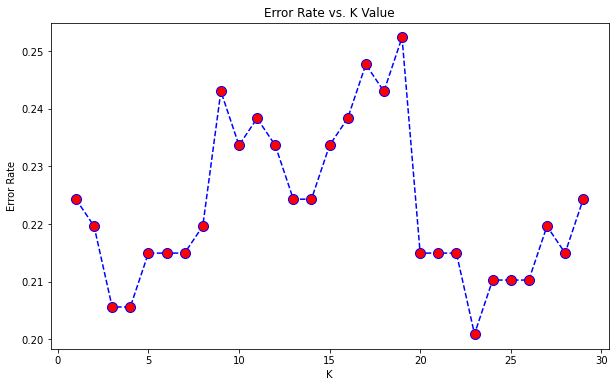

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [43]:
#assigning variables to dependent and independend values

independent=data.drop('Survived',axis=1)
target=data['Survived']
independent

,Pclass,Age,Fare,male,Q,S
0,3,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,3,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,1
4,3,35.0,8.0500,1,0,1
...,...,...,...,...,...,...
885,3,39.0,29.1250,0,1,0
886,2,27.0,13.0000,1,0,1
887,1,19.0,30.0000,0,0,1
889,1,26.0,30.0000,1,0,0


In [44]:
#Training and testing the data
Xtrain,Xtest,ytrain,ytest=train_test_split(independent,target,test_size=0.3,random_state=0)

In [45]:
#Model

NB=GaussianNB()
NB.fit(Xtrain,ytrain)
ypred=NB.predict(Xtest)

In [46]:
accuracy_score(ytest,ypred)

0.7289719626168224

Inference: 

Among all the algorithms we got high accuracy level 79.9% in Decision Tree algorithm while using the Gini_index, while using the Enrotpy(information gain) we got almost similar score 79.4%.

Second most algorithm performed well is KNN we got accuracy level 78.4%

When comparing to other algorithms used we got the least accuracty 72% in Naive Bayes.